<a href="https://colab.research.google.com/github/theofil/CompPhysics/blob/master/examples/CMSOpenDataDimuonMass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Demo from Konstantinos Theofilatos (25.11.2020) using CMS dimuon open data from
# McCauley, Thomas; (2014). 
# Events with two muons from 2010. 
# CERN Open Data Portal. 
# http://doi.org/10.7483/OPENDATA.CMS.4M97.3SQ9
# http://opendata.cern.ch/record/303# 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# read the data directly from the remote CERN site, make a pandas "dataframe"
df = pd.read_csv('http://opendata.cern.ch/record/303/files/dimuon.csv')

In [10]:
df.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GT,146511,25343052,7.33390,2.060420,5.88580,-3.85836,6.23602,-0.584812,1.234060,-1,5.20755,-1.55016,-1.819760,4.62525,2.39050,1.414110,-2.276360,1,11.82820
1,GG,146511,25341481,18.46720,8.033950,-3.94072,-16.15410,8.94839,-1.352990,-0.456026,-1,10.72950,6.29476,-2.524410,-8.31349,6.78208,-1.032390,-0.381397,1,2.58406
2,GG,146511,25390065,7.70222,-0.248771,4.08338,6.52511,4.09095,1.246340,1.631640,-1,6.90202,-3.02439,3.751290,4.94041,4.81862,0.899132,2.249320,1,3.11929
3,GG,146511,25391068,6.59462,5.246510,2.16082,3.35900,5.67407,0.561945,0.390686,1,7.43461,-5.06069,4.408010,3.19704,6.71127,0.459977,2.425020,-1,10.51920
4,GG,146511,25489877,45.77350,8.864420,1.28931,-44.88830,8.95770,-2.314620,0.144435,-1,9.27485,-3.64696,-0.276874,8.52260,3.65745,1.582250,-3.065820,1,40.98300


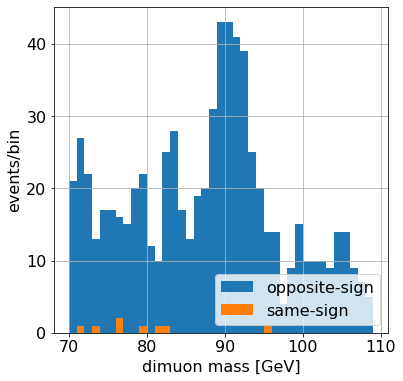

In [11]:
# define figure size, axis labes
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('events/bin')
ax.set_xlabel('dimuon mass [GeV]')
plt.rc('font', size=16)
#ax.set_yscale('log')

df[(df.Q1*df.Q2 < 0) & (df.pt2 > 5)]['M'].hist(bins = range(70,110), ax = ax, label = 'opposite-sign') 
df[(df.Q1*df.Q2 > 0) & (df.pt2 > 5)]['M'].hist(bins = range(70,110), ax = ax, label = 'same-sign')
plt.legend(loc=4)

# The mass peak near 90 GeV, is consistent with what we expect from 
# an electroweak Z boson. Can you find other resonances elsewhere in the 
# dimuon mass spectrum ?

In [12]:
df.columns

Index(['Type', 'Run', 'Event', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M'],
      dtype='object')

In [13]:
# There is a typo in the original data file from CSV: The variable 'px1' is 
# labeled with an extra space 'px1 ' which is unfortunate. We will rename the
# whole column and eliminate this extra space in the variable's definition
print('before the fix:', df.columns)
df = df.rename(columns={'px1 ': 'px1'})
print('after the fix:', df.columns)

before the fix: Index(['Type', 'Run', 'Event', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M'],
      dtype='object')
after the fix: Index(['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M'],
      dtype='object')


In [14]:
# Example: How define now a new variable, with pre-calculated the transverse momentum of the dilepton system
df['PTll'] = ((df['px1'] + df['px2'])**2 + (df['py1'] + df['py2'])**2)**0.5
df.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,PTll
0,GT,146511,25343052,7.33390,2.060420,5.88580,-3.85836,6.23602,-0.584812,1.234060,-1,5.20755,-1.55016,-1.819760,4.62525,2.39050,1.414110,-2.276360,1,11.82820,4.097932
1,GG,146511,25341481,18.46720,8.033950,-3.94072,-16.15410,8.94839,-1.352990,-0.456026,-1,10.72950,6.29476,-2.524410,-8.31349,6.78208,-1.032390,-0.381397,1,2.58406,15.719728
2,GG,146511,25390065,7.70222,-0.248771,4.08338,6.52511,4.09095,1.246340,1.631640,-1,6.90202,-3.02439,3.751290,4.94041,4.81862,0.899132,2.249320,1,3.11929,8.490915
3,GG,146511,25391068,6.59462,5.246510,2.16082,3.35900,5.67407,0.561945,0.390686,1,7.43461,-5.06069,4.408010,3.19704,6.71127,0.459977,2.425020,-1,10.51920,6.571458
4,GG,146511,25489877,45.77350,8.864420,1.28931,-44.88830,8.95770,-2.314620,0.144435,-1,9.27485,-3.64696,-0.276874,8.52260,3.65745,1.582250,-3.065820,1,40.98300,5.314783


The dilepton system is produced with 11.002 GeV of transverse momentum, on average


Text(0.5, 0, 'PT(ll) [GeV]')

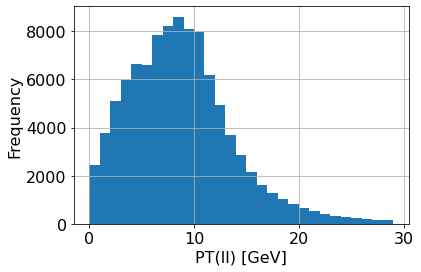

In [15]:
ax = df['PTll'].plot.hist('PTll', bins = range(0, 30), grid='true')
print('The dilepton system is produced with %2.3f GeV of transverse momentum, on average'%(df['PTll'].mean()))
ax.set_xlabel('PT(ll) [GeV]')